# Autoencoders on the MNIST dataset
Filippo Fantinato 2041620

On this notebook I experimented with shallow linear, shallow non-linear and deep non-linear autoencoders exploiting the pytorch library.

In [1]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

torch.manual_seed(42)

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# Importing the train and test datasets
num_workers = 0
batch_size = 20
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Let's define a method which takes a general AutoEncoder, the learning rate and the number of epochs, and returns the model trained.

In [4]:
def train_evaluate_AE(AE, train_loader, lr, n_epochs):
  model = AE().to(device)
  loss_function = torch.nn.MSELoss()
  optimizer = torch.optim.Adam(
      model.parameters(), 
      lr = lr
    )

  for epoch in range(1, n_epochs+1):
      train_loss = 0.0
      for data in train_loader:
          images, _ = data
          images = images.view(images.size(0), -1)
          optimizer.zero_grad()
          outputs = model(images)
          loss = loss_function(outputs, images)
          loss.backward()
          optimizer.step()
          train_loss += loss.item()*images.size(0)

      train_loss = train_loss/len(train_loader)
      print('Epoch:', epoch, '\tTraining Loss:', train_loss)

  return model

In [5]:
def plot_AE(model, data_loader):
  dataiter = iter(data_loader)
  images, labels = dataiter.next()

  images_flatten = images.view(images.size(0), -1)
  output = model(images_flatten)
  images = images.numpy()

  output = output.view(batch_size, 1, 28, 28)
  output = output.detach().numpy()

  fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

  for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
      ax.imshow(np.squeeze(img), cmap='gray')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

## Shallow Linear AutoEncoder

In [41]:
class AEShallowLinear(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28*28, 128),
          )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(128, 28*28),
          )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

Epoch: 1 	Training Loss: 0.17253244874533266
Epoch: 2 	Training Loss: 0.0965057903714478
Epoch: 3 	Training Loss: 0.0950592540934061
Epoch: 4 	Training Loss: 0.09473289351289471
Epoch: 5 	Training Loss: 0.09444934201116363
Epoch: 6 	Training Loss: 0.09437109078280628
Epoch: 7 	Training Loss: 0.09434568876090149
Epoch: 8 	Training Loss: 0.09406754174114515
Epoch: 9 	Training Loss: 0.09410001317970455
Epoch: 10 	Training Loss: 0.09401878396514803
Epoch: 11 	Training Loss: 0.09399330145213752
Epoch: 12 	Training Loss: 0.09385437974706293
Epoch: 13 	Training Loss: 0.09392470046722641
Epoch: 14 	Training Loss: 0.09371914434401939
Epoch: 15 	Training Loss: 0.09376375339925289
Epoch: 16 	Training Loss: 0.09373459762117516
Epoch: 17 	Training Loss: 0.09368838067476948
Epoch: 18 	Training Loss: 0.09364596240067234
Epoch: 19 	Training Loss: 0.0936393955675885
Epoch: 20 	Training Loss: 0.0935752566686521


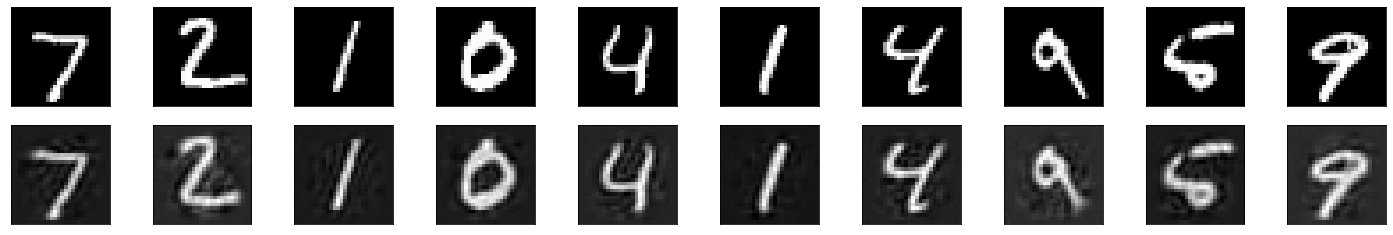

In [42]:
ae_shallow_linear = train_evaluate_AE(AEShallowLinear, train_loader, lr = 1e-3, n_epochs = 20)
plot_AE(ae_shallow_linear, test_loader)

## Shallow non-linear AutoEncoder

In [43]:
class AEShallowNonLinear(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28*28, 128),
            torch.nn.Tanh()
          )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(128, 28*28),
            torch.nn.Tanh()
          )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

Epoch: 1 	Training Loss: 0.24133059837544957
Epoch: 2 	Training Loss: 0.14583127634910245
Epoch: 3 	Training Loss: 0.14198644087960322
Epoch: 4 	Training Loss: 0.1407331971420596
Epoch: 5 	Training Loss: 0.14010827806778253
Epoch: 6 	Training Loss: 0.1397192348477741
Epoch: 7 	Training Loss: 0.13944913289820154
Epoch: 8 	Training Loss: 0.13922919465228914
Epoch: 9 	Training Loss: 0.13905324471804004
Epoch: 10 	Training Loss: 0.13890269783325493
Epoch: 11 	Training Loss: 0.13877355185026924
Epoch: 12 	Training Loss: 0.13866538803714018
Epoch: 13 	Training Loss: 0.13856678310781717
Epoch: 14 	Training Loss: 0.13849066163413226
Epoch: 15 	Training Loss: 0.1384198325748245
Epoch: 16 	Training Loss: 0.1383633020799607
Epoch: 17 	Training Loss: 0.13830971769367656
Epoch: 18 	Training Loss: 0.13826771606380742
Epoch: 19 	Training Loss: 0.13822229887358845
Epoch: 20 	Training Loss: 0.13818703224882484


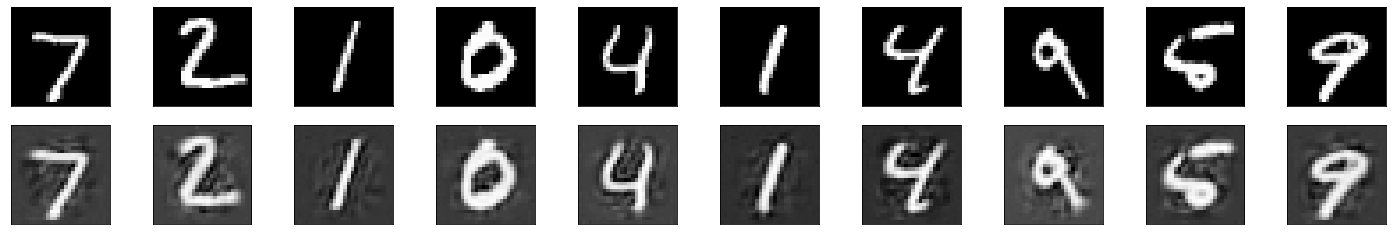

In [44]:
ae_shallow_nonlinear = train_evaluate_AE(AEShallowNonLinear, train_loader, lr = 1e-3, n_epochs = 20)
plot_AE(ae_shallow_nonlinear, test_loader)

## Deep Non Linear AutoEncoder

In [45]:
class AEDeepNonLinear(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28*28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 8),
            torch.nn.ReLU()
          )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(8, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28*28),
            torch.nn.ReLU()
          )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

Epoch: 1 	Training Loss: 1.072147030569613
Epoch: 2 	Training Loss: 0.785674113134543
Epoch: 3 	Training Loss: 0.741701195674638
Epoch: 4 	Training Loss: 0.7250454911589622
Epoch: 5 	Training Loss: 0.7137419546643893
Epoch: 6 	Training Loss: 0.7081914099802573
Epoch: 7 	Training Loss: 0.702525123419861
Epoch: 8 	Training Loss: 0.6986813363557061
Epoch: 9 	Training Loss: 0.6950426235298316
Epoch: 10 	Training Loss: 0.6921078077703714
Epoch: 11 	Training Loss: 0.6910794080918033
Epoch: 12 	Training Loss: 0.6876782096922398
Epoch: 13 	Training Loss: 0.6854076285039385
Epoch: 14 	Training Loss: 0.6854352737590671
Epoch: 15 	Training Loss: 0.6836089143405358
Epoch: 16 	Training Loss: 0.6828449892873565
Epoch: 17 	Training Loss: 0.6806690423935652
Epoch: 18 	Training Loss: 0.6802815008287628
Epoch: 19 	Training Loss: 0.6791422841822108
Epoch: 20 	Training Loss: 0.678863452685376
Epoch: 21 	Training Loss: 0.6780460255593062
Epoch: 22 	Training Loss: 0.6777229698250691
Epoch: 23 	Training Loss

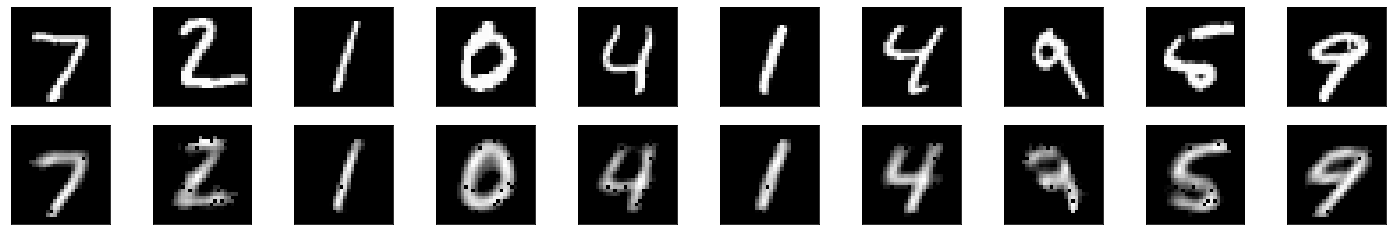

In [46]:
ae_deep_nonlinear = train_evaluate_AE(AEDeepNonLinear, train_loader, lr = 3e-3, n_epochs = 30)
plot_AE(ae_deep_nonlinear, test_loader)